# Projeto Ciência de Dados - Previsão de Vendas
Desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

## Observações:
- TV, Jornal e Rádio estão em milhares de reais.
- Vendas estão em milhões.

In [47]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier


from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage 



sns.set_style('darkgrid')
# sns.set_context('talk')
sns.set_palette('rainbow')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
cores_personalizadas = cores_personalizadas = ['rgb(80, 120, 225)', 'rgb(125, 216, 235)']

import plotly.io as pio
from IPython.display import Image


In [48]:
df = pd.read_csv('advertising.csv')

In [49]:
display(df)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [51]:
df.describe()

,TV,Radio,Jornal,Vendas
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [52]:
display(df.corr())

,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


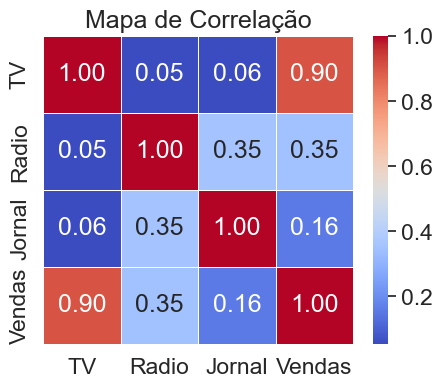

In [53]:
# Calcule a matriz de correlação
matriz_correlacao = df.corr()

# Crie um mapa de calor (heatmap) usando o Seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Correlação')
plt.show()

## Preparação dos dados para treinarmos o modelo de ML

### Separando os dados de treino dos dados de teste.

In [54]:
# y --> quem você quer prever
y = df['Vendas']

In [55]:
# x --> vai usar para prever as vendas
x = df[['TV', 'Radio', 'Jornal']]

In [56]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.3)

## Temos um problema de regressão - escolher qual modelo usar:

### Regressão Linear

### RandomForest (Árvore de descisão)

In [57]:
# criar 
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

#treinar
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

print('Modelos treinados!')


Modelos treinados!


## Teste de AI e Avaliação do Melhor Modelo:

### Vamos usar o R2 --> diz a % que o nosso modelo consegue explicar o que acontece:

In [58]:
# fazer as previsões:
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)

# comparar a previsão com o y_test
print(r2_score(y_teste, previsao_arvoredecisao))
print(r2_score(y_teste, previsao_regressaolinear))

0.9405904789019189
0.8886201949253894


## Visualização gráfica das previsões:


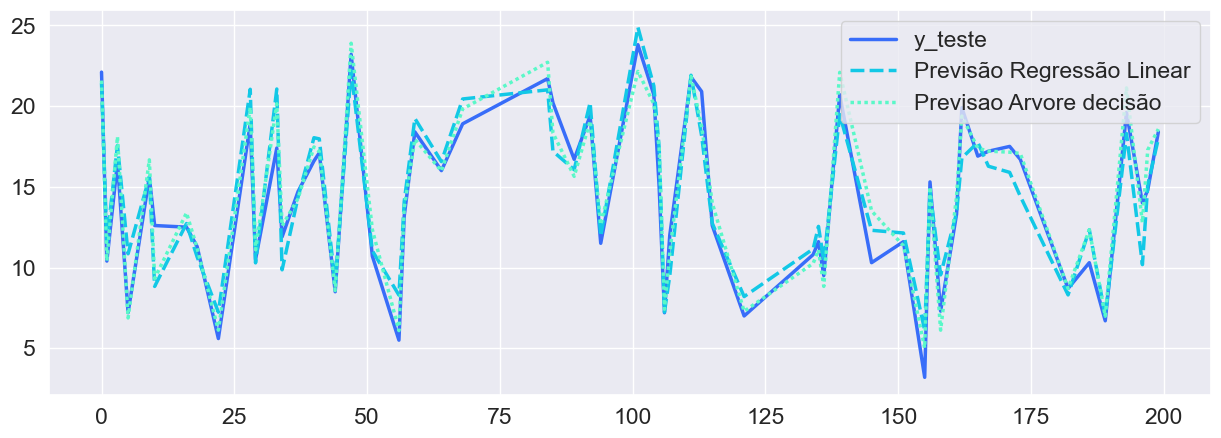

In [59]:
tabela_auxiliar =pd.DataFrame()
tabela_auxiliar['y_teste'] = y_teste
tabela_auxiliar['Previsão Regressão Linear'] = previsao_regressaolinear
tabela_auxiliar['Previsao Arvore decisão'] = previsao_arvoredecisao

plt.figure(figsize=(15,5))
sns.lineplot(data=tabela_auxiliar)
plt.show()

## Como fazer uma nova previsão

In [60]:
tabela_nova = pd.read_excel('novos.xlsx')
display(tabela_nova)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [61]:
previsao = modelo_arvoredecisao.predict(tabela_nova)
print(previsao)

[ 7.447  8.428 21.28 ]


## Previsões: 

Se você investir: 23.1, 3.8, 69.2, você vai vender 7 milhões; 

Se você investir: 44.5, 00, 5.1,  você vai vendar 8 milhões;

Se você investir; 170.2, 45.9 e 00, você vai vender 20 milhões.

### Qual a importância de cada variável para as vendas?

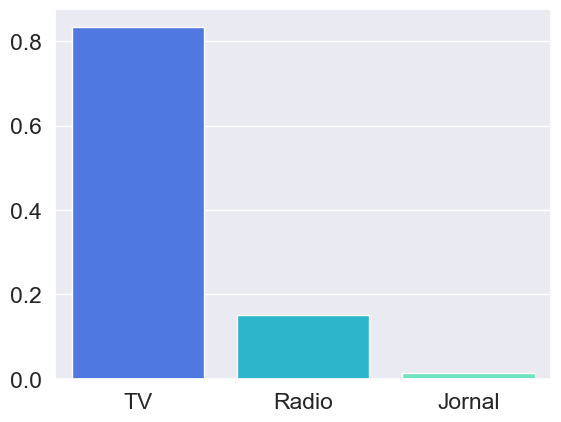

In [62]:
sns.barplot(x=x_treino.columns, y=modelo_arvoredecisao.feature_importances_)
plt.show()

# Caso queira comparar Radio com Jornal
# print(df[["Radio", "Jornal"]].sum())